### Data obtained from Beveridge et al., ACS Cent. Sci., 2020 (https://doi.org/10.1021/acscentsci.0c00049)

In [1]:
import pytrate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = "nMS_AT1"
outputprefix = "nMS_protacs"

colors = [(0.4,0,0),
          (0.6,0,0),
          (0,0.4,0),
          (0,0.6,0),  
          (0.6,0.6,0)]
          
symbols = ['o',
           'o',
           'o',
           'o',
           'o',
           'o',]

In [3]:
g = pytrate.GlobalFit()

a = pytrate.BaseExperiment(filename+'.csv',pytrate.indiv_models.TPOL_nMS,uncertainty=0.05)

g.add_experiment(a)

First column of data file assumed to be ligand concentration
Second column of data file assumed to be component A concentration
Third column of data file assumed to be component B concentration



In [4]:
# make association constant initial guesses
log10_K_AB_guess = 8
log10_K_AL_guess = 6   
log10_K_BL_guess = 6   
log10_a_guess    = 3 # cooperativity

g.update_guess("log10_K_AB",log10_K_AB_guess,a)
g.update_guess("log10_K_AL",log10_K_AL_guess,a)
g.update_guess("log10_K_BL",log10_K_BL_guess,a)
g.update_guess("log10_a",log10_a_guess,a)

# fix conc uncertainty parameters
g.update_fixed("conc_corr_A",1.0,a)
#g.update_fixed("conc_corr_B",1.0,a)
g.update_fixed("conc_corr_L",1.0,a)
g.update_dist_vars("conc_corr_B",(0.8,1.0),a)

# update bounds and uncertainty models
g.update_dist_type("log10_K_AB",1,a)
g.update_dist_type("log10_K_AL",1,a)
g.update_dist_type("log10_K_BL",1,a)

#g.update_dist_vars("log10_K_AB",(5.,10.),a)
g.update_dist_vars("log10_K_AL",(3.,8.),a)
g.update_dist_vars("log10_K_BL",(3.,8.),a)

# Force weak AB affinity
g.update_fixed("log10_K_AB",1.0,a)

In [5]:
F = pytrate.fitters.BayesianFitter(num_steps=1000,ml_guess=False,initial_walker_spread=1e-3,burn_in=0.8)
g.fit(F)

/home/martin/miniconda3/lib/python3.8/site-packages/emcee-3.1.1-py3.8.egg/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


Mean acceptance fraction: 0.543 



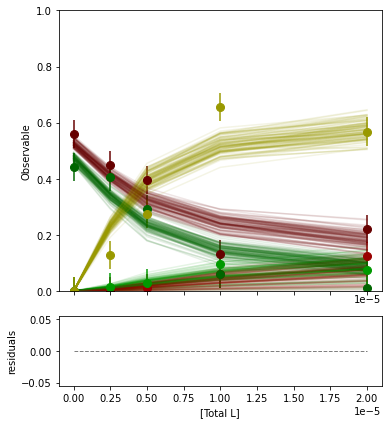

In [6]:
fig, ax = g.plot(logplot=False,color_list=colors)
ax[0].set_ylim(0,1)
try:
    fig.savefig(outputprefix+'_fitBayes.pdf',format='pdf',transparent=True)
except PermissionError:
    print("Please close open figure, appending file name with '_'")
    fig.savefig(outputprefix+'_fitBayes_.pdf',format='pdf',transparent=True)

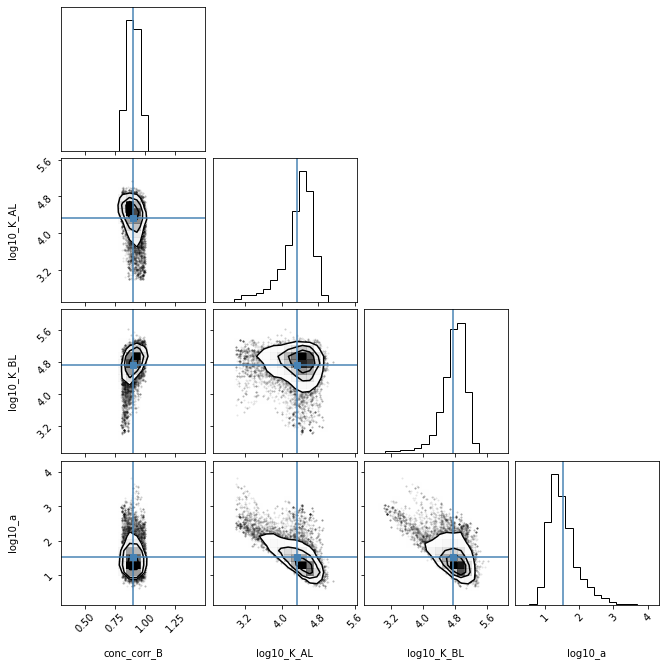

In [7]:
c = g.corner_plot()
try:
    c.savefig(outputprefix+'_corner.pdf',format='pdf',transparent=True)
except PermissionError:
    print("Please close open figure, appending file name with '_'")    
    c.savefig(outputprefix+'_corner_.pdf',format='pdf',transparent=True)